In [1]:
from tensorflow import config as tf_config
import tensorflow.compat.v1 as tf
import warnings

from gym import make as gym_make
from game import Game

import matplotlib.pyplot as plt
import numpy as np

In [2]:
warnings.filterwarnings("ignore")
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [3]:
gpu_amount = len(tf_config.experimental.list_physical_devices('GPU'))
print(f'GPU acceleration enabled = {gpu_amount > 0}')

GPU acceleration enabled = True


In [4]:
env = gym_make('LunarLander-v2')

game = Game(env, False)
game.load()
game.start(1)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


100%|██████████| 1/1 [00:02<00:00,  2.86s/it]

Total reward: -329.6114321633982


In [5]:
def plot_running_avg(totalrewards):
    episodes = len(totalrewards)
    running_avg = np.empty(episodes)
    for episode in range(episodes):
        running_avg[episode] = totalrewards[max(0, episode-100):(episode+1)].mean()
    plt.plot(running_avg)
    plt.title("Running Average")
    plt.show()

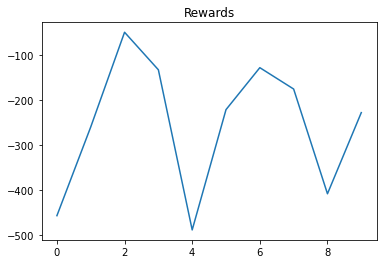

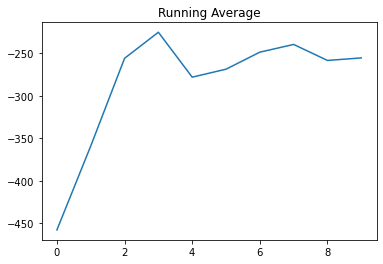

In [6]:
file = open("../saves/totalrewards.txt", 'r')
totalrewards = np.array([float(line.rstrip('\n')) for line in file])

plt.plot(totalrewards)
plt.title("Rewards")
plt.show()

plot_running_avg(totalrewards)